In [2]:
import matplotlib.pyplot as plt
from util import Metric
import numpy as np
import os

print(os.getcwd())

/home/arash/workspace/solar_flare_cnn


(5, 2, 2)
[Metric(tss: 68.81, f1:  11.06, cm: [[225169, 99782], [30, 6204]]), Metric(tss: 67.49, f1:  10.65, cm: [[220877, 104074], [30, 6204]]), Metric(tss: 68.13, f1:  10.83, cm: [[222691, 102260], [25, 6209]]), Metric(tss: 67.38, f1:  10.61, cm: [[220317, 104634], [26, 6208]]), Metric(tss: 66.26, f1:  10.27, cm: [[216404, 108547], [21, 6213]])]
[np.float64(0.8166636593279337), np.float64(0.7978531398569726), np.float64(0.8058426305002189), np.float64(0.7993829877464695), np.float64(0.7901785526920739)]


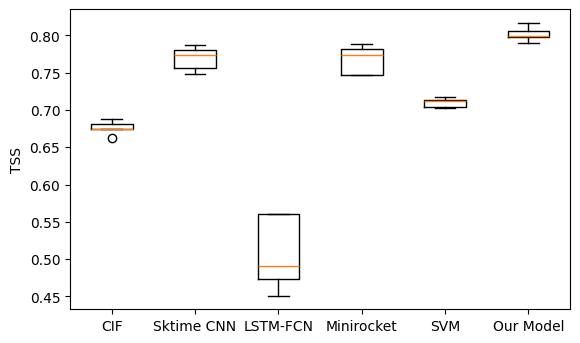

In [2]:
cif = np.load("./experiments_plot/baseline_cif_True_cm.npy")
cnn = np.load("./experiments_plot/baseline_cnn_True_cm.npy")
lstmfcn = np.load("./experiments_plot/baseline_lstmfcn_True_cm.npy")
minirocket = np.load("./experiments_plot/baseline_minirocket_True_cm.npy")
svm = np.load("./experiments_plot/baseline_svm_True_cm.npy")
mine = np.load("./experiments_plot/train_True_cm_False.npy")
print(mine.shape)
cif = [Metric(binary=True, cm=cm) for cm in cif]
cnn = [Metric(binary=True, cm=cm) for cm in cnn]
lstmfcn = [Metric(binary=True, cm=cm) for cm in lstmfcn]
minirocket = [Metric(binary=True, cm=cm) for cm in minirocket]
svm = [Metric(binary=True, cm=cm) for cm in svm]
mine = [Metric(binary=True, cm=cm) for cm in mine]

datashow = [[m.tss for m in cif],
            [m.tss for m in cnn],
            [m.tss for m in lstmfcn],
            [m.tss for m in minirocket],
            [m.tss for m in svm],
            [m.tss for m in mine]]

print(cif)
fig = plt.figure(figsize=(5, 3))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(datashow)
ax.set_xticklabels(
    ["CIF", "Sktime CNN", "LSTM-FCN", "Minirocket", "SVM", "Our Model"])
print(datashow[-1])
plt.ylabel("TSS")
plt.show()

In [3]:
# cif = np.load("./experiments_plot/baseline_cif_True_same_seed_cm.npy")
svm = np.load("./experiments_plot/baseline_svm_True_same_seed_cm.npy")
# cnn = np.load("./experiments_plot/baseline_cnn_True_same_seed_cm.npy")
lstmfcn = np.load("./experiments_plot/baseline_lstmfcn_True_same_seed_cm.npy")
# minirocket = np.load("./experiments_plot/baseline_minirocket_True_same_seed_cm.npy")
# svm = np.load("./experiments_plot/baseline_svm_True_same_seed_cm.npy")
# cif = [Metric(binary=True, cm=cm) for cm in cif]
# cnn = [Metric(binary=True, cm=cm) for cm in cnn]
lstmfcn = [Metric(binary=True, cm=cm) for cm in lstmfcn]
# minirocket = [Metric(binary=True, cm=cm) for cm in minirocket]
svm = [Metric(binary=True, cm=cm) for cm in svm]
# mine = [Metric(binary=True, cm=cm) for cm in mine]
print(svm)

[Metric(tss: 41.24, f1:  10.17, cm: [[86479, 105715], [234, 5998]]), Metric(tss: 37.89, f1:   9.62, cm: [[79324, 112870], [211, 6021]]), Metric(tss: 38.00, f1:   9.66, cm: [[80366, 111828], [238, 5994]]), Metric(tss: 38.76, f1:   9.85, cm: [[84238, 107956], [316, 5916]]), Metric(tss: 36.20, f1:   9.40, cm: [[76922, 115272], [238, 5994]])]


In [39]:
def stats(metrics):
    tss = [m.tss for m in metrics]
    hss2 = [m.hss2 for m in metrics]
    acc = [m.accuracy for m in metrics]
    prec = [m.precision for m in metrics]
    rec = [m.recall for m in metrics]
    f1 = [m.f1 for m in metrics]
    
    return ((np.average(tss), np.std(tss)), (np.average(hss2), np.std(hss2)),
            (np.average(acc), np.std(acc)), (np.average(prec), np.std(prec)),
            (np.average(rec), np.std(rec)), (np.average(f1), np.std(f1)))


cif = np.load("./experiments_plot/baseline_cif_True_cm.npy")
cnn = np.load("./experiments_plot/baseline_cnn_True_cm.npy")
lstmfcn = np.load("./experiments_plot/baseline_lstmfcn_True_cm.npy")
minirocket = np.load("./experiments_plot/baseline_minirocket_True_cm.npy")
svm = np.load("./experiments_plot/baseline_svm_True_cm.npy")
mine = np.load("./experiments_plot/train_True_cm_False.npy")

cif = [Metric(binary=True, cm=cm) for cm in cif]
cnn = [Metric(binary=True, cm=cm) for cm in cnn]
lstmfcn = [Metric(binary=True, cm=cm) for cm in lstmfcn]
minirocket = [Metric(binary=True, cm=cm) for cm in minirocket]
svm = [Metric(binary=True, cm=cm) for cm in svm]
mine = [Metric(binary=True, cm=cm) for cm in mine]

statsin = []
statsin.append(stats(cif))
statsin.append(stats(cnn))
statsin.append(stats(lstmfcn))
statsin.append(stats(minirocket))
statsin.append(stats(svm))
statsin.append(stats(mine))

metrics = ["TSS", "HSS2", "Accuracy", "Precision", "Recall", "F1"]
for j in range(len(metrics)):
    string = f"\t\t{metrics[j]} & "
    for i in range(len(statsin)):
        string += f" ${statsin[i][j][0]:.3f} \\pm {statsin[i][j][1]:.3f}$ "
        if i != 5: string += " & "
    string += " \\\\ "
    print(string)

		TSS &  $0.701 \pm 0.008$  &  $0.796 \pm 0.017$  &  $0.549 \pm 0.051$  &  $0.789 \pm 0.003$  &  $0.710 \pm 0.005$  &  $0.780 \pm 0.016$  \\ 
		HSS2 &  $0.090 \pm 0.004$  &  $0.229 \pm 0.021$  &  $0.244 \pm 0.032$  &  $0.272 \pm 0.002$  &  $0.127 \pm 0.002$  &  $0.272 \pm 0.012$  \\ 
		Accuracy &  $0.739 \pm 0.009$  &  $0.900 \pm 0.013$  &  $0.935 \pm 0.019$  &  $0.922 \pm 0.001$  &  $0.756 \pm 0.003$  &  $0.923 \pm 0.004$  \\ 
		Precision &  $0.065 \pm 0.002$  &  $0.148 \pm 0.014$  &  $0.173 \pm 0.028$  &  $0.178 \pm 0.001$  &  $0.092 \pm 0.001$  &  $0.178 \pm 0.008$  \\ 
		Recall &  $0.966 \pm 0.002$  &  $0.897 \pm 0.028$  &  $0.607 \pm 0.069$  &  $0.866 \pm 0.003$  &  $0.959 \pm 0.003$  &  $0.857 \pm 0.017$  \\ 
		F1 &  $0.123 \pm 0.004$  &  $0.254 \pm 0.020$  &  $0.266 \pm 0.030$  &  $0.295 \pm 0.002$  &  $0.168 \pm 0.002$  &  $0.294 \pm 0.011$  \\ 


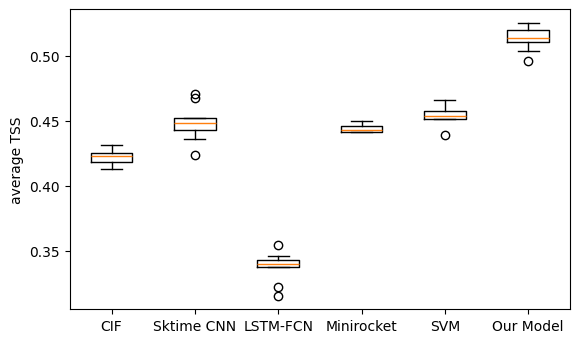

[Metric(avg tss:  51.10, tss: [67.35359102 33.03369112 41.20186691 62.79234656],cm: [[209322, 55116, 9402, 402], [5096, 26925, 16121, 2567], [14, 1130, 2793, 1752], [0, 27, 168, 350]]), Metric(avg tss:  52.52, tss: [67.13846944 39.22656966 41.72915063 61.97542381],cm: [[208838, 59757, 5396, 251], [5110, 30963, 12633, 2003], [22, 1447, 2692, 1528], [0, 34, 167, 344]]), Metric(avg tss:  50.38, tss: [67.55070784 39.48530901 34.18674023 60.29069283],cm: [[210768, 57537, 5278, 659], [5285, 30680, 11123, 3621], [13, 1402, 2235, 2039], [0, 8, 198, 339]]), Metric(avg tss:  51.60, tss: [65.67619057 33.71888234 37.60119186 69.41610599],cm: [[205242, 61172, 7161, 667], [5199, 28382, 13852, 3276], [19, 1230, 2509, 1931], [0, 8, 149, 388]]), Metric(avg tss:  52.53, tss: [67.27994189 35.32200371 44.2820008  63.23765197],cm: [[209173, 57953, 6632, 484], [5108, 28603, 14631, 2367], [13, 1171, 2894, 1611], [0, 12, 181, 352]]), Metric(avg tss:  49.62, tss: [67.03058456 35.11911863 41.73810093 54.5751830

In [4]:
binary = False
cif = np.load(f"./experiments_plot/baseline_cif_{binary}_cm.npy")
cnn = np.load(f"./experiments_plot/baseline_cnn_{binary}_cm.npy")
lstmfcn = np.load(f"./experiments_plot/baseline_lstmfcn_{binary}_cm.npy")
minirocket = np.load(f"./experiments_plot/baseline_minirocket_{binary}_cm.npy")
svm = np.load(f"./experiments_plot/baseline_svm_{binary}_cm.npy")
mine = np.load(f"./experiments_plot/train_{binary}_cm_False.npy")

cif = [Metric(binary=False, cm=cm) for cm in cif]
cnn = [Metric(binary=False, cm=cm) for cm in cnn]
lstmfcn = [Metric(binary=False, cm=cm) for cm in lstmfcn]
minirocket = [Metric(binary=False, cm=cm) for cm in minirocket]
svm = [Metric(binary=False, cm=cm) for cm in svm]
mine = [Metric(binary=False, cm=cm) for cm in mine]
datashow = [[np.average(m.tss) for m in cif],
            [np.average(m.tss) for m in cnn],
            [np.average(m.tss) for m in lstmfcn],
            [np.average(m.tss) for m in minirocket],
            [np.average(m.tss) for m in svm],
            [np.average(m.tss) for m in mine]]
fig = plt.figure(figsize=(5, 3))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(datashow)
ax.set_xticklabels(
    ["CIF", "Sktime CNN", "LSTM-FCN", "Minirocket", "SVM", "Our Model"])
plt.ylabel("average TSS")
plt.show()
print(mine)

In [42]:
binary = False


def stats(metrics):
    tss = [np.average(m.tss) for m in metrics]
    tss_each = []
    for i in range(4):
        tss_each.append([m.tss[i] for m in metrics])
    hss2 = [np.average(m.hss2) for m in metrics]
    acc = [np.average(m.accuracy) for m in metrics]
    prec = [np.average(m.precision) for m in metrics]
    rec = [np.average(m.recall) for m in metrics]
    f1 = [np.average(m.f1) for m in metrics]
    
    return ((np.average(tss), np.std(tss)),
            (np.average(tss_each[0]), np.std(tss_each[0])),
            (np.average(tss_each[1]), np.std(tss_each[1])),
            (np.average(tss_each[2]), np.std(tss_each[2])),
            (np.average(tss_each[3]), np.std(tss_each[3])),
            (np.average(hss2), np.std(hss2)),
            (np.average(acc), np.std(acc)), (np.average(prec), np.std(prec)),
            (np.average(rec), np.std(rec)), (np.average(f1), np.std(f1)))


cif = np.load(f"./experiments_plot/baseline_cif_{binary}_cm.npy")
cnn = np.load(f"./experiments_plot/baseline_cnn_{binary}_cm.npy")
lstmfcn = np.load(f"./experiments_plot/baseline_lstmfcn_{binary}_cm.npy")
minirocket = np.load(f"./experiments_plot/baseline_minirocket_{binary}_cm.npy")
svm = np.load(f"./experiments_plot/baseline_svm_{binary}_cm.npy")
mine = np.load(f"./experiments_plot/train_{binary}_cm.npy")

cif = [Metric(binary=binary, cm=cm) for cm in cif]
cnn = [Metric(binary=binary, cm=cm) for cm in cnn]
lstmfcn = [Metric(binary=binary, cm=cm) for cm in lstmfcn]
minirocket = [Metric(binary=binary, cm=cm) for cm in minirocket]
svm = [Metric(binary=binary, cm=cm) for cm in svm]
mine = [Metric(binary=binary, cm=cm) for cm in mine]

statsin = []
statsin.append(stats(cif))
statsin.append(stats(cnn))
statsin.append(stats(lstmfcn))
statsin.append(stats(minirocket))
statsin.append(stats(svm))
statsin.append(stats(mine))

metrics = ["TSS", "TSS  Class Q", "TSS  Class BC", "TSS  Class M", "TSS  Class X", "HSS2", "Accuracy",
           "Precision", "Recall", "F1"]
print(len(metrics))
for j in range(len(metrics)):
    if len(metrics[j].split("  ")) > 1:
        string = f"\t\t{metrics[j].split('  ')[0]} & {metrics[j].split('  ')[1]} & "
    else:
        string = f"\t\t\\multicolumn{{2}}{{l}}{{{metrics[j]}}} & "
    for i in range(len(statsin)):
        string += f" ${statsin[i][j][0]:.2f} \\pm {statsin[i][j][1]:.2f}$ "
        if i != 5: string += " & "
    string += " \\\\ "
    print(string)

10
		\multicolumn{2}{l}{TSS} &  $0.44 \pm 0.01$  &  $0.48 \pm 0.02$  &  $0.39 \pm 0.01$  &  $0.49 \pm 0.01$  &  $0.32 \pm 0.00$  &  $0.50 \pm 0.02$  \\ 
		TSS & Class Q &  $0.63 \pm 0.00$  &  $0.65 \pm 0.01$  &  $0.64 \pm 0.01$  &  $0.67 \pm 0.00$  &  $0.42 \pm 0.00$  &  $0.66 \pm 0.01$  \\ 
		TSS & Class BC &  $0.42 \pm 0.00$  &  $0.46 \pm 0.02$  &  $0.54 \pm 0.01$  &  $0.47 \pm 0.00$  &  $0.29 \pm 0.00$  &  $0.37 \pm 0.04$  \\ 
		TSS & Class M &  $0.44 \pm 0.01$  &  $0.58 \pm 0.04$  &  $0.31 \pm 0.02$  &  $0.55 \pm 0.01$  &  $0.27 \pm 0.00$  &  $0.49 \pm 0.04$  \\ 
		TSS & Class X &  $0.29 \pm 0.04$  &  $0.23 \pm 0.09$  &  $0.09 \pm 0.05$  &  $0.26 \pm 0.03$  &  $0.30 \pm 0.00$  &  $0.46 \pm 0.07$  \\ 
		\multicolumn{2}{l}{HSS2} &  $0.30 \pm 0.00$  &  $0.30 \pm 0.01$  &  $0.34 \pm 0.01$  &  $0.31 \pm 0.00$  &  $0.26 \pm 0.00$  &  $0.26 \pm 0.02$  \\ 
		\multicolumn{2}{l}{Accuracy} &  $0.89 \pm 0.00$  &  $0.85 \pm 0.00$  &  $0.91 \pm 0.00$  &  $0.87 \pm 0.00$  &  $0.85 \pm 0.00$  &  $